In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Customer Damographic Dataset

In [3]:
df_demographic = pd.read_excel("CustomerDemographic.xlsx")
df_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

### Customer Address Dataset

In [5]:
df_address = pd.read_excel("CustomerAddress.xlsx")
df_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


### Transactions Data Set

In [7]:
df_transaction = pd.read_excel("Transactions.xlsx")
df_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,42791,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,42876,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,43024,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,42978,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,43009,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [8]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  int64  
 4   online_order             19640 non-null  float64
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  float64
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 2.0+ MB


### Merge Datasets

In [9]:
df = df_transaction.merge(df_demographic, on = "customer_id").merge(df_address, on = "customer_id")
df.head().T

,0,1,2,3,4
transaction_id,1,11065,18923,2,6862
product_id,2,1,62,3,4
customer_id,2950,2950,2950,3120,3120
transaction_date,42791,43024,42851,42876,43013
online_order,0,0,0,1,0
order_status,Approved,Approved,Approved,Approved,Approved
brand,Solex,Giant Bicycles,Solex,Trek Bicycles,Giant Bicycles
product_line,Standard,Standard,Standard,Standard,Standard
product_class,medium,medium,medium,medium,high
product_size,medium,medium,medium,large,medium


In [10]:
df.shape

(19968, 30)

### New Customers DataSet

In [11]:
df_newcust = pd.read_excel("NewCustomerList.xlsx")
df_newcust.head().T

,0,1,2,3,4
first_name,Chickie,Morly,Ardelis,Lucine,Melinda
last_name,Brister,Genery,Forrester,Stutt,Hadlee
gender,Male,Male,Female,Female,Female
past_3_years_bike_related_purchases,86,69,10,64,34
DOB,1957-07-12 00:00:00,1970-03-22 00:00:00,1974-08-28 00:00:00,1979-01-28 00:00:00,1965-09-21 00:00:00
job_title,General Manager,Structural Engineer,Senior Cost Accountant,Account Representative III,Financial Analyst
job_industry_category,Manufacturing,Property,Financial Services,Manufacturing,Financial Services
wealth_segment,Mass Customer,Mass Customer,Affluent Customer,Affluent Customer,Affluent Customer
deceased_indicator,N,N,N,N,N
owns_car,Yes,No,No,Yes,No


**Drop unnecessary columns**

In [12]:
df_newcust = df_newcust.drop(columns = ["Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Value", "Rank"])

### Merge Old and New Customers

In [13]:
df_new = pd.concat([df, df_newcust])

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20968 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  float64       
 1   product_id                           19968 non-null  float64       
 2   customer_id                          19968 non-null  float64       
 3   transaction_date                     19968 non-null  float64       
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price  

In [15]:
df_new.head().T

,0,1,2,3,4
transaction_id,1,11065,18923,2,6862
product_id,2,1,62,3,4
customer_id,2950,2950,2950,3120,3120
transaction_date,42791,43024,42851,42876,43013
online_order,0,0,0,1,0
order_status,Approved,Approved,Approved,Approved,Approved
brand,Solex,Giant Bicycles,Solex,Trek Bicycles,Giant Bicycles
product_line,Standard,Standard,Standard,Standard,Standard
product_class,medium,medium,medium,medium,high
product_size,medium,medium,medium,large,medium


### Data Preparation

**Drop default column**

In [16]:
df_new = df_new.drop(columns = ["default"])

**Merge same states**

In [17]:
df_new["state"] = df_new["state"].replace(["VIC", "NSW", "QLD"], ["Victoria", "New South Wales", "Queensland"])

**Merge female gender**

In [18]:
df_new["gender"] = df_new["gender"].replace(["F", "Femal"], "Female")

**Merge male and unspecified gender**

In [19]:
df_new["gender"] = df_new["gender"].replace(["M"], ["Male"])

**Remove Unspecified Gender**

In [20]:
df_new = df_new[~df_new["gender"].str.contains(r"U")]

**Convert transaction_date column type from int date to datetime**

In [21]:
df_new["transaction_date"] = pd.to_datetime(df_new["transaction_date"], unit = "s")

**Convert product_first_sold_date column type from int date to datetime**

In [22]:
df_new["product_first_sold_date"] = pd.to_datetime(df_new["product_first_sold_date"], unit = "s")

**Rename Deceased Indicator Values**

In [23]:
df_new["deceased_indicator"] = df_new["deceased_indicator"].replace(["N", "Y"], ["No", "Yes"])

**Convert DOB to Age**

In [24]:
def dob_age(born):
    today = datetime.date.today()
    return today.year - born.year

df_new["Age"] = df_new["DOB"].apply(lambda x: dob_age(x))

**Add Profit Column**

In [25]:
df_new["Profit"] = df_new["list_price"] - df_new["standard_cost"]

In [26]:
df_new.head().T

,0,1,2,3,4
transaction_id,1,11065,18923,2,6862
product_id,2,1,62,3,4
customer_id,2950,2950,2950,3120,3120
transaction_date,1970-01-01 11:53:11,1970-01-01 11:57:04,1970-01-01 11:54:11,1970-01-01 11:54:36,1970-01-01 11:56:53
online_order,0,0,0,1,0
order_status,Approved,Approved,Approved,Approved,Approved
brand,Solex,Giant Bicycles,Solex,Trek Bicycles,Giant Bicycles
product_line,Standard,Standard,Standard,Standard,Standard
product_class,medium,medium,medium,medium,high
product_size,medium,medium,medium,large,medium


# Data Insights

### 1- Transactions

**Number of transactions**

In [27]:
transactions = df_new["transaction_id"].count()
print("Total transactions are = " + str(transactions))

Total transactions are = 19513


**Number of unique customers**

In [28]:
customers = df_new["customer_id"].nunique()
print("Number of unique customers = " + str(customers))

Number of unique customers = 3412


### 2-Products

**Number of Products**

In [29]:
products = df_new["product_id"].nunique()
print("Number of unique products = " + str(products))

Number of unique products = 101


### 3- Online Orders

**Number of onine orders**

In [30]:
online_order = df_new["online_order"].sum()
print("Number of online orders = " + str(online_order))

Number of online orders = 9587.0


**Approved and Disapproved Orders**

In [31]:
orders = df_new["order_status"].value_counts().reset_index()
orders = pd.DataFrame(orders)
orders.columns = ["Status", "Orders"]
orders

,Status,Orders
0,Approved,19337
1,Cancelled,176


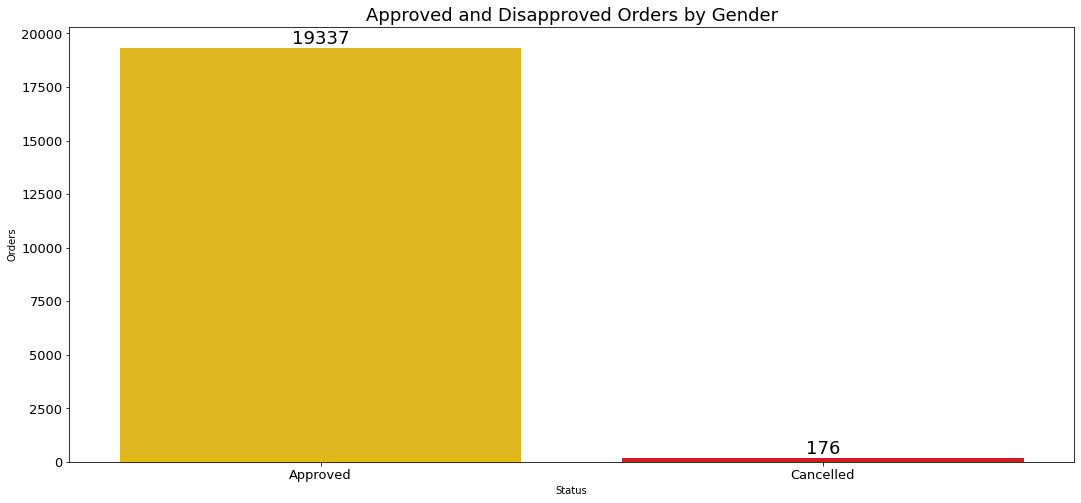

In [32]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Status", y = "Orders", data = orders, palette = "hot_r")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Approved and Disapproved Orders by Gender", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Approved and Disapproved Orders by Gender**

In [33]:
gender_orders = df_new.groupby(["order_status", "gender"])["transaction_id"].agg(["count"])
gender_orders = gender_orders.reset_index()
gender_orders.columns = ["Status", "Gender", "Orders"]
gender_orders

,Status,Gender,Orders
0,Approved,Female,9905
1,Approved,Male,9432
2,Cancelled,Female,92
3,Cancelled,Male,84


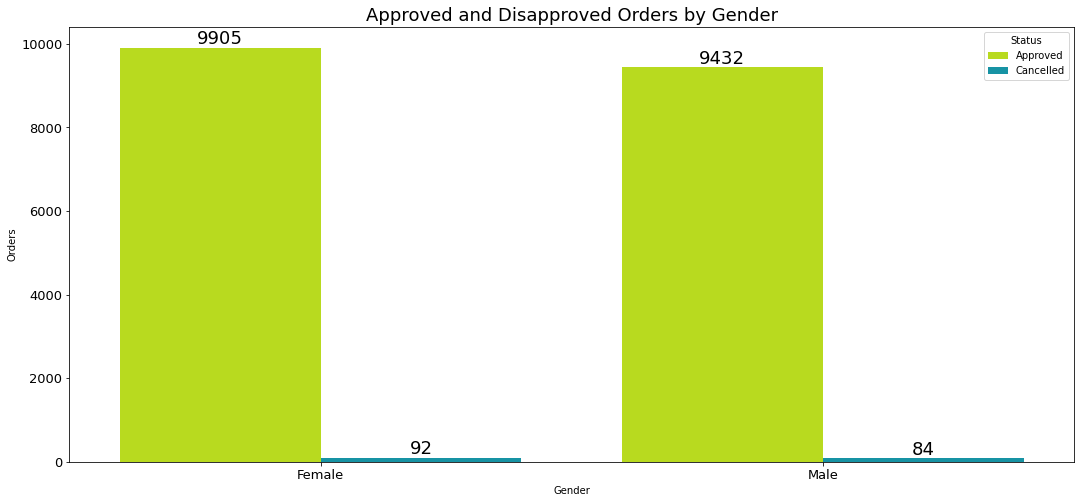

In [34]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Gender", y = "Orders",  hue = "Status", data = gender_orders, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Approved and Disapproved Orders by Gender", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

### 4-Brands

**Total Brands**

In [35]:
brands = df_new["brand"].value_counts()
brands = pd.DataFrame(brands).reset_index()
brands.columns = ["Brand", "Total"]
brands

,Brand,Total
0,Solex,4171
1,Giant Bicycles,3236
2,WeareA2B,3203
3,OHM Cycles,2976
4,Trek Bicycles,2914
5,Norco Bicycles,2827


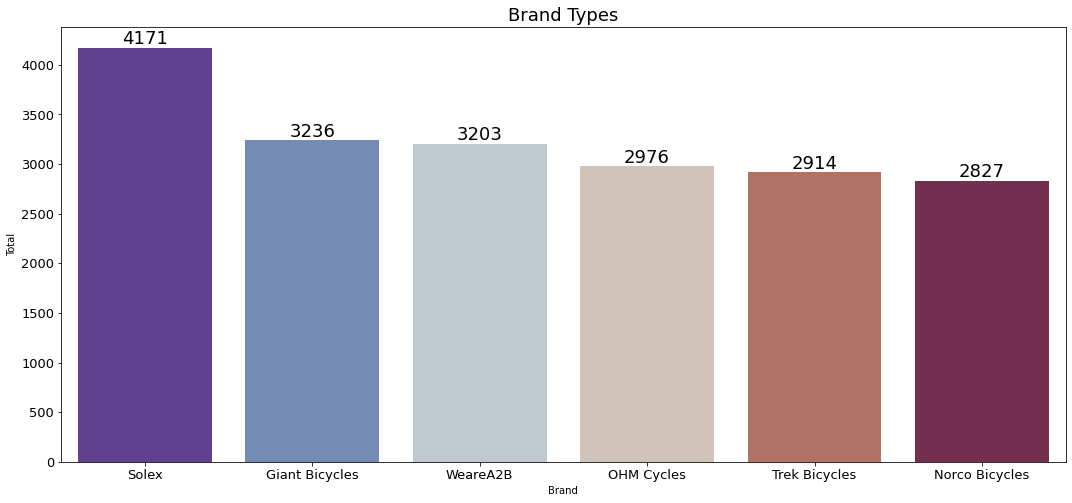

In [36]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Brand", y = "Total", data = brands, palette = "twilight_shifted")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Brand Types", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

### 5-Product Lines

**Total Product Lines**

In [37]:
product_line = df_new["product_line"].value_counts()
product_line = pd.DataFrame(product_line).reset_index()
product_line.columns = ["Product Line", "Total"]
product_line

,Product Line,Total
0,Standard,13851
1,Road,3871
2,Touring,1193
3,Mountain,412


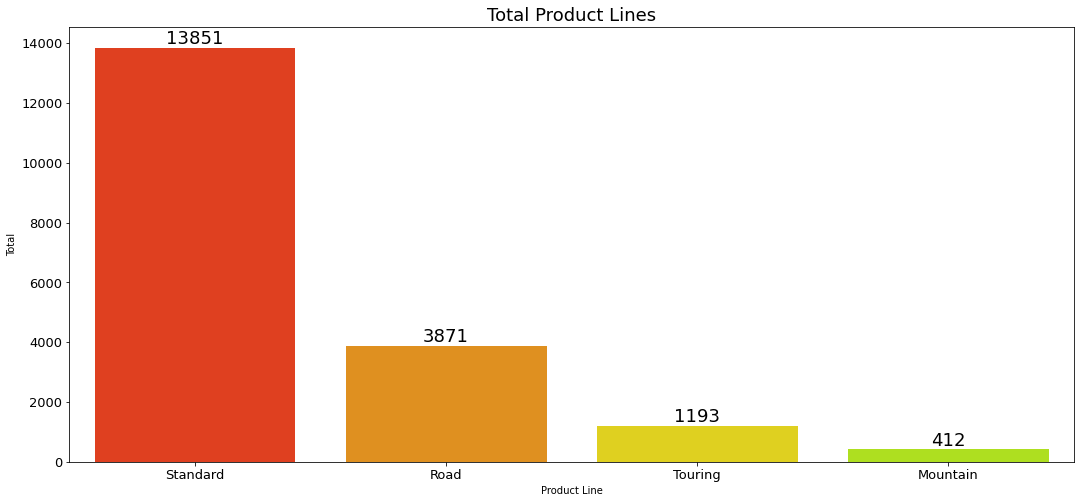

In [38]:
plt.figure(figsize = (18, 8))
sns.color_palette("Set3", 9)
graph = sns.barplot(x = "Product Line", y = "Total", data = product_line, palette = "prism")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Total Product Lines", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

### 6- Product Classes

**Total Product Classes**

In [39]:
product_classes = df_new["product_class"].value_counts()
product_classes = pd.DataFrame(product_classes).reset_index()
product_classes.columns = ["Product Class", "Total"]
product_classes

,Product Class,Total
0,medium,13477
1,high,2945
2,low,2905


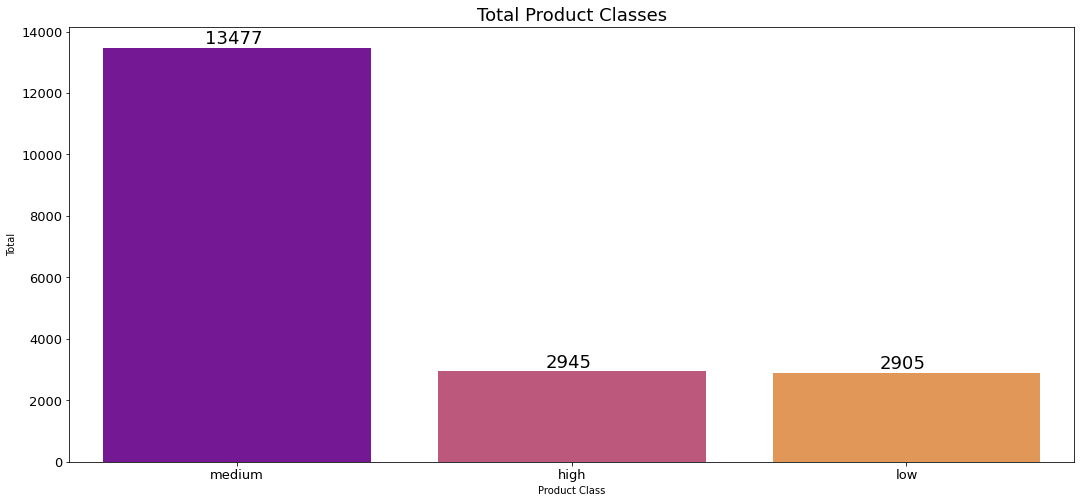

In [40]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Product Class", y = "Total", data = product_classes, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Total Product Classes", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Total Cost of Product Classes**

In [41]:
cpc = df_new.groupby(["product_class"])["standard_cost"].agg(["sum"]).reset_index()
cpc.columns = ["Class", "Cost"]
cpc

,Class,Cost
0,high,2118983.23
1,low,1513949.58
2,medium,7108044.82


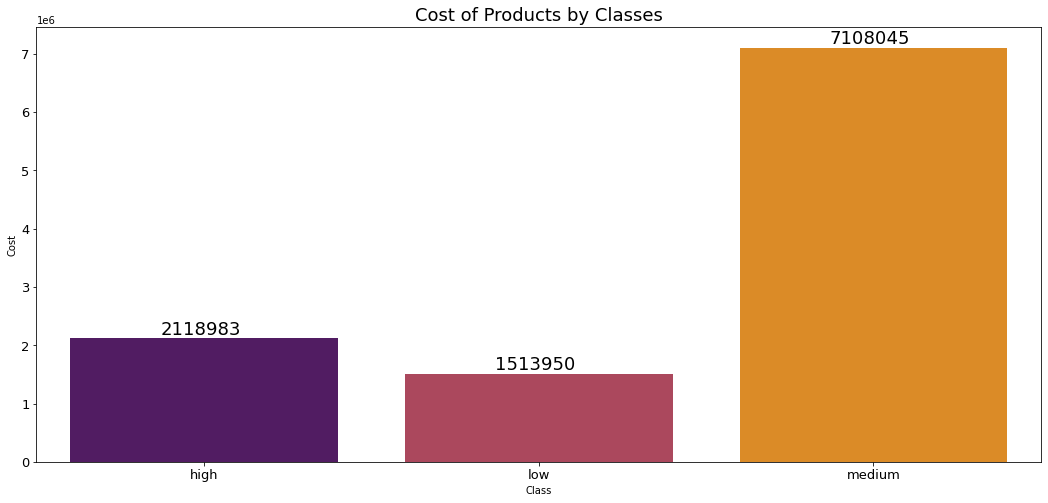

In [42]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Class", y = "Cost", data = cpc, palette = "inferno")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Cost of Products by Classes", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Minimum Cost of Products by Class**

In [43]:
cpc = df_new.groupby(["product_class"])["standard_cost"].agg(["min"]).reset_index()
cpc.columns = ["Class", "Minimum Cost"]
cpc

,Class,Minimum Cost
0,high,7.21
1,low,56.93
2,medium,13.44


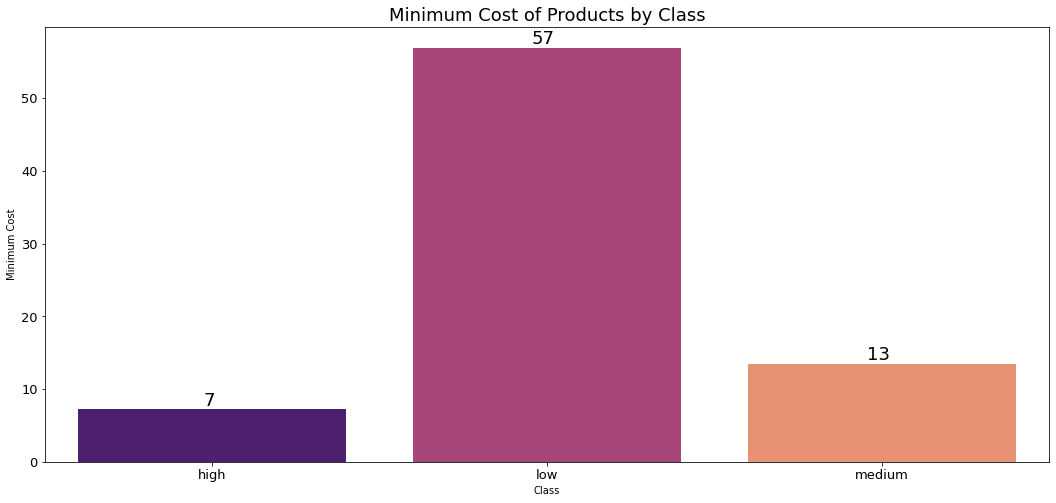

In [44]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Class", y = "Minimum Cost", data = cpc, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Minimum Cost of Products by Class", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Maximum Cost of Product by Class**

In [45]:
cpc = df_new.groupby(["product_class"])["standard_cost"].agg(["max"]).reset_index()
cpc.columns = ["Class", "Maximum Cost"]
cpc

,Class,Maximum Cost
0,high,1759.85
1,low,1531.42
2,medium,1610.90


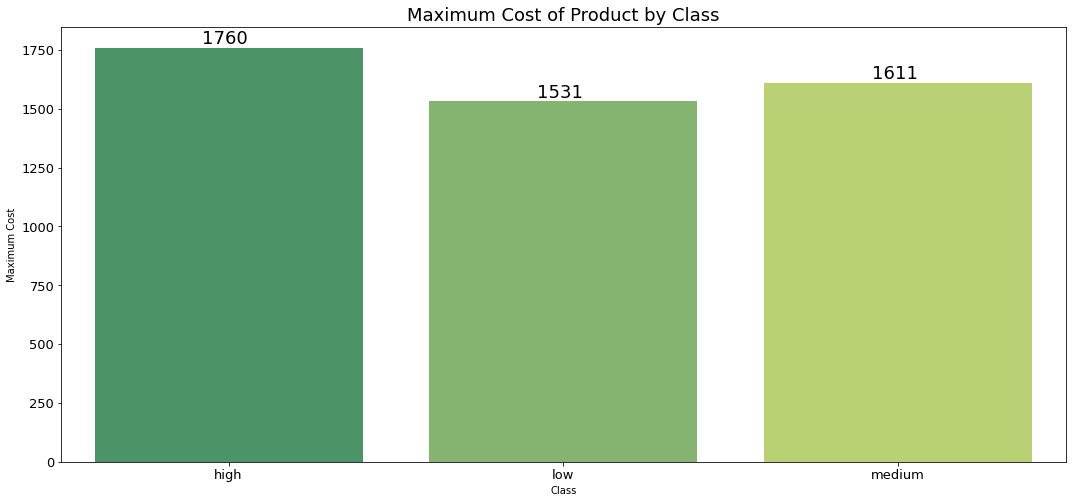

In [46]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Class", y = "Maximum Cost", data = cpc, palette = "summer")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Maximum Cost of Product by Class", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Total Revenue by Product Class**

In [111]:
cps = df_new.groupby(["product_class"])["list_price"].agg(["sum"]).reset_index()
cps.columns = ["Class", "Revenue"]
cps

,Class,Revenue
0,high,3210586.65
1,low,2691292.11
2,medium,15482435.05


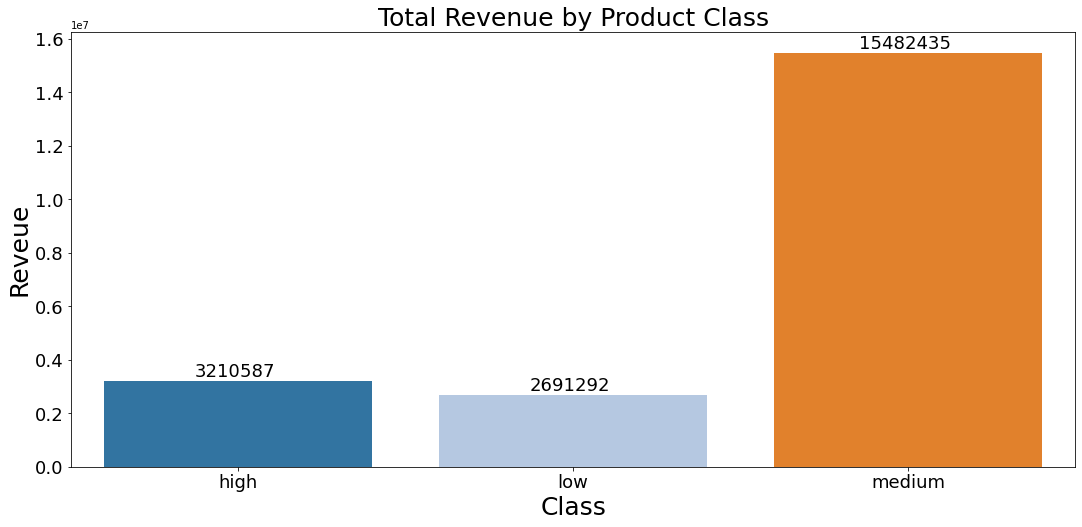

In [121]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Class", y = "Revenue", data = cps, palette = "tab20")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Total Revenue by Product Class", size = 25)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("Class", size = 25)
plt.ylabel("Reveue", size = 25)
plt.show()

**Total Profit by Product Class**

In [133]:
tp = df_new.groupby(["product_class"])["Profit"].agg(["sum"]).reset_index()
tp.columns = ["Class", "Profit"]
tp

,Class,Profit
0,high,1091603.42
1,low,1177342.53
2,medium,8374390.23


**Minimum Revenue by Product Class**

In [124]:
mrp = df_new.groupby("product_class")["list_price"].agg(["min"]).reset_index()
mrp.columns = ["Class", "Minimum Revenue"]
mrp

,Class,Minimum Revenue
0,high,12.01
1,low,71.16
2,medium,60.34


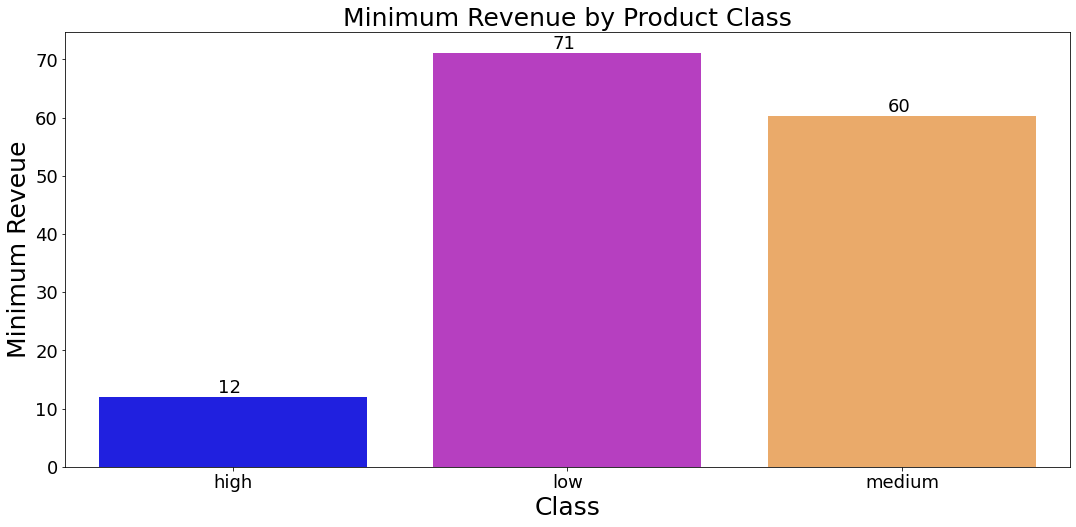

In [127]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Class", y = "Minimum Revenue", data = mrp, palette = "gnuplot2")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Minimum Revenue by Product Class", size = 25)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("Class", size = 25)
plt.ylabel("Minimum Reveue", size = 25)
plt.show()

**Maximum Revenue by Product Class**

In [129]:
max_r = df_new.groupby(["product_class"])["list_price"].agg(["max"]).reset_index()
max_r.columns = ["Class", "Maximum Revenue"]
max_r

,Class,Maximum Revenue
0,high,2005.66
1,low,1793.43
2,medium,2091.47


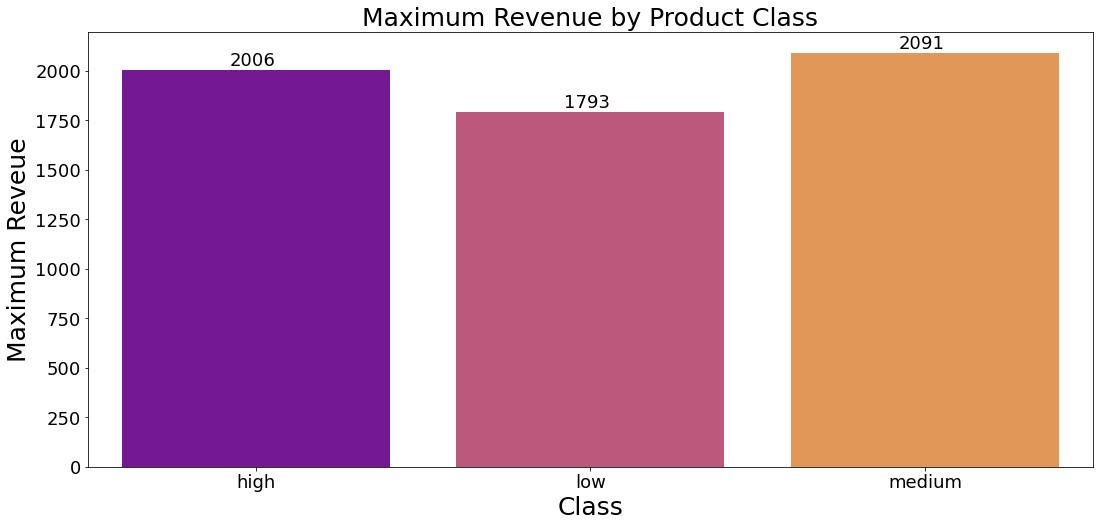

In [130]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Class", y = "Maximum Revenue", data = max_r, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Maximum Revenue by Product Class", size = 25)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("Class", size = 25)
plt.ylabel("Maximum Reveue", size = 25)
plt.show()

### 7-Product Size

**Product Size by Items**

In [48]:
product_size = df_new["product_size"].value_counts()
product_size = pd.DataFrame(product_size).reset_index()
product_size.columns = ["Product Size", "Total"]
product_size

,Product Size,Total
0,medium,12685
1,large,3880
2,small,2762


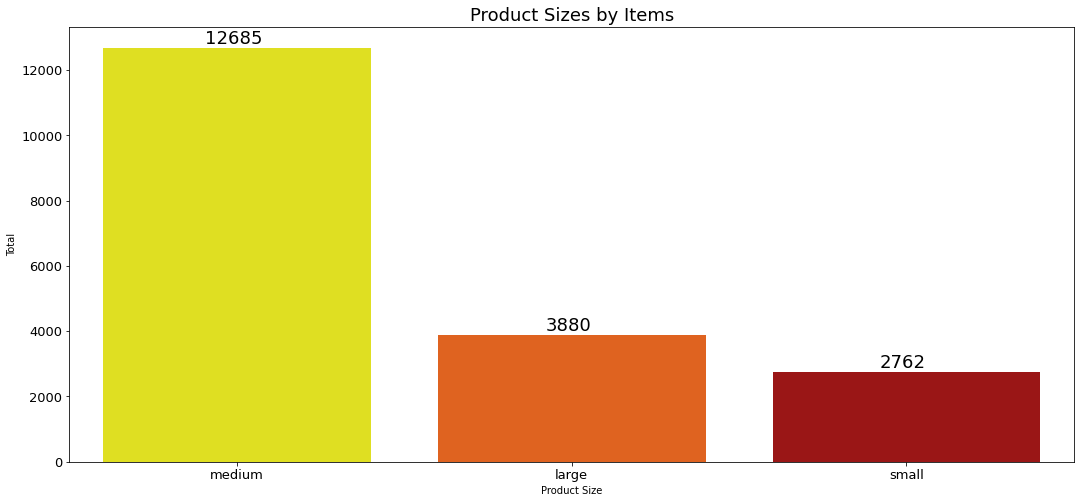

In [49]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Product Size", y = "Total", data = product_size, palette = "hot_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Product Sizes by Items", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Profits by Product Sizes**

In [50]:
profit_size = df_new.groupby(["product_size"])["Profit"].agg(["sum"]).reset_index()
profit_size.columns = ["Size", "Profits"]
profit_size

,Size,Profits
0,large,3551817.85
1,medium,6699485.35
2,small,392032.98


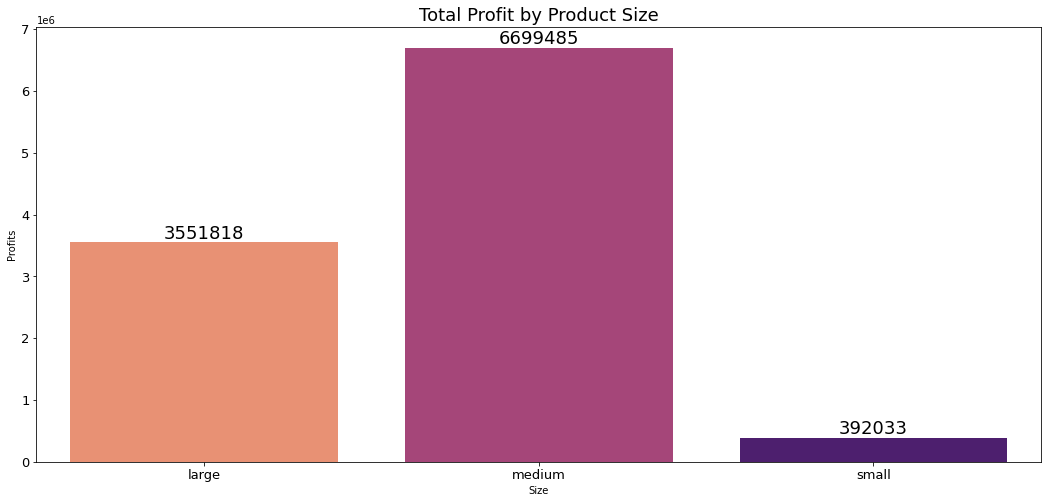

In [51]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Profits", data = profit_size, palette = "magma_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Total Profit by Product Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Maximum Profit by Size**

In [52]:
mps = df_new.groupby(["product_size"])["Profit"].agg(["max"]).reset_index()
mps.columns = ["Size", "Max Profit"]

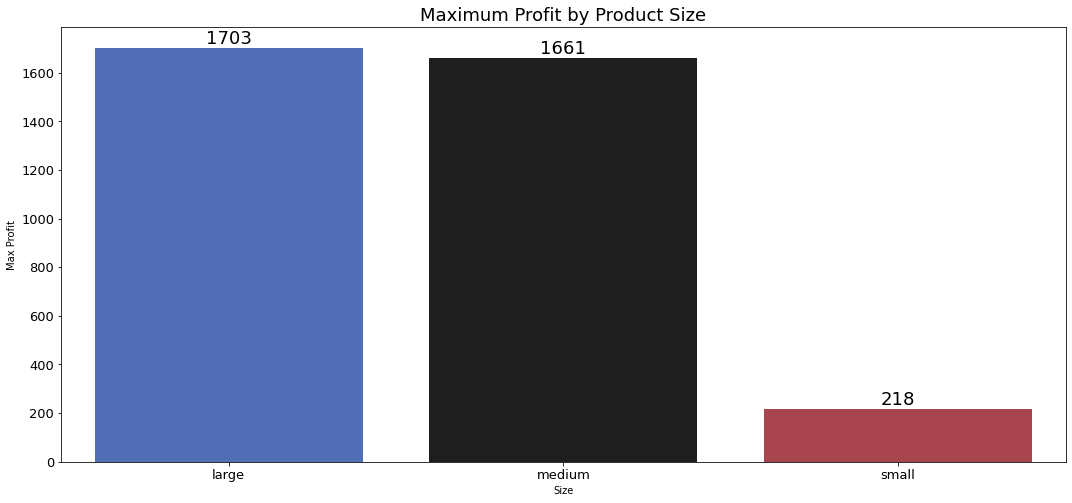

In [53]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Max Profit", data = mps, palette = "icefire")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Maximum Profit by Product Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Minimum Profit by Product Size**

In [54]:
min_ps = df_new.groupby(["product_size"])["Profit"].agg(["min"]).reset_index()
min_ps.columns = ["Size", "Min Profit"]
min_ps

,Size,Min Profit
0,large,4.80
1,medium,14.23
2,small,43.97


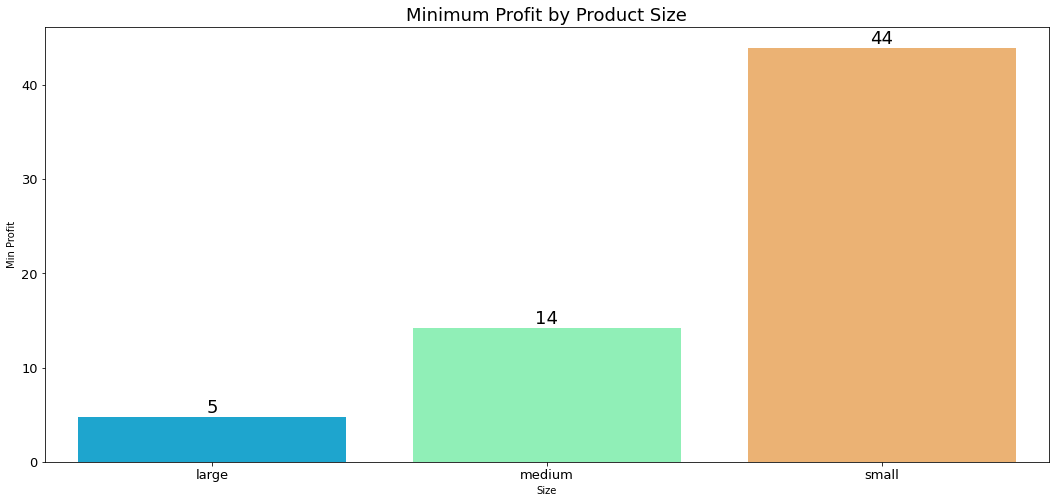

In [55]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Min Profit", data = min_ps, palette = "rainbow")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Minimum Profit by Product Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Total Revenue by Size**

In [56]:
selling_size = df_new.groupby(["product_size"])["list_price"].agg(["sum"]).reset_index()
selling_size.columns = ["Size", "Revenue"]
selling_size

,Size,Revenue
0,large,5705061.35
1,medium,12156526.50
2,small,3522725.96


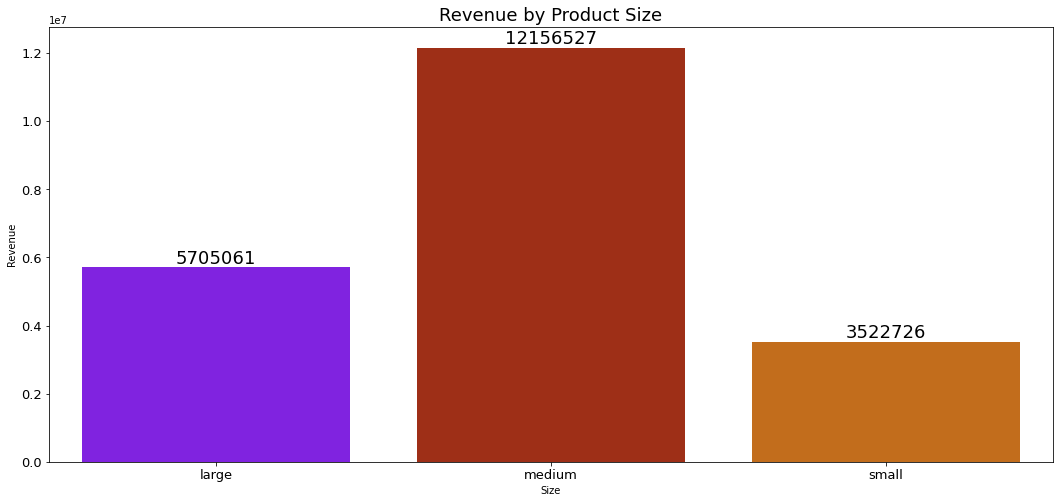

In [57]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Revenue", data = selling_size, palette = "gnuplot")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Revenue by Product Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Maximum Products Selling Price by Size**

In [58]:
costly_products = df_new.groupby(["product_size"])["list_price"].agg(["max"]).reset_index()
costly_products.columns = ["Size", "Maximum Sale Price"]
costly_products

,Size,Maximum Sale Price
0,large,2091.47
1,medium,2005.66
2,small,1977.36


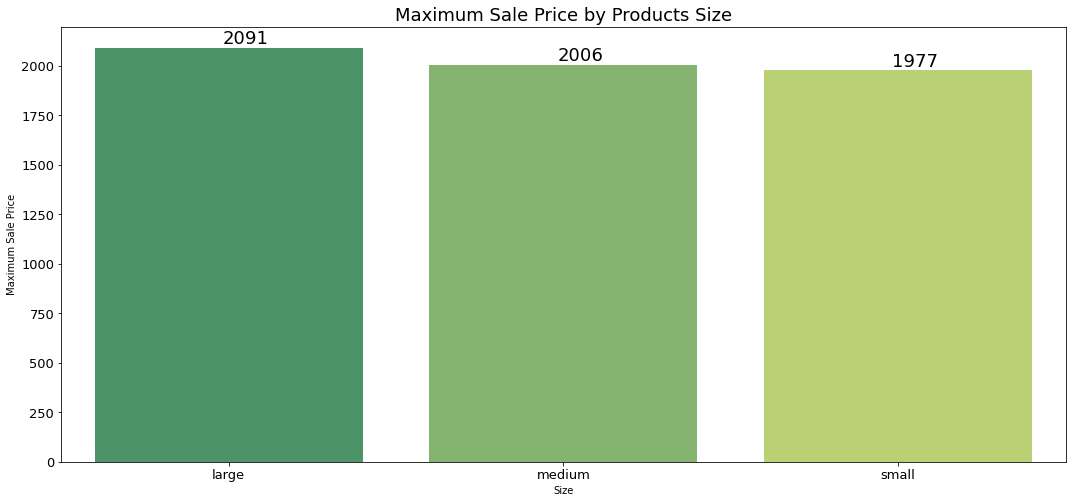

In [59]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Maximum Sale Price", data = costly_products, palette = "summer")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Maximum Sale Price by Products Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Minimum Sale Price by Products Size**

In [60]:
msp_ps = df_new.groupby(["product_size"])["list_price"].agg(["min"]).reset_index()
msp_ps.columns = ["Size", "Minimum Sale Price"]
msp_ps

,Size,Minimum Sale Price
0,large,12.01
1,medium,60.34
2,small,175.89


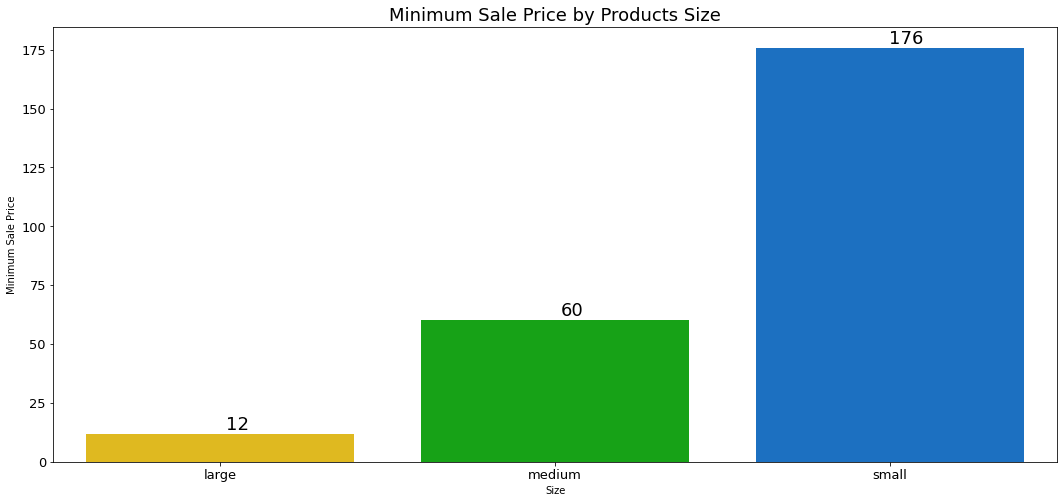

In [61]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Minimum Sale Price", data = msp_ps, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Minimum Sale Price by Products Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Cost of Products by Size**

In [62]:
cps = df_new.groupby("product_size")["standard_cost"].agg(["sum"]).reset_index()
cps.columns = ["Size", "Cost"]
cps

,Size,Cost
0,large,2153243.50
1,medium,5457041.15
2,small,3130692.98


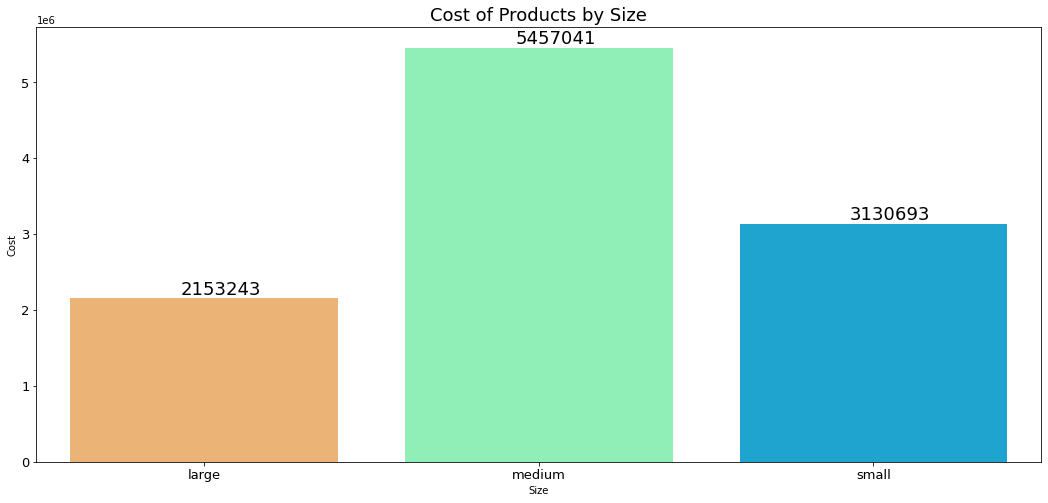

In [63]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Cost", data = cps, palette = "rainbow_r")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Cost of Products by Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Maximum Cost by Size**

In [64]:
mcs = df_new.groupby("product_size")["standard_cost"].agg(["max"]).reset_index()
mcs.columns = ["Size", "Maximum Cost"]
mcs

,Size,Maximum Cost
0,large,1105.75
1,medium,1203.40
2,small,1759.85


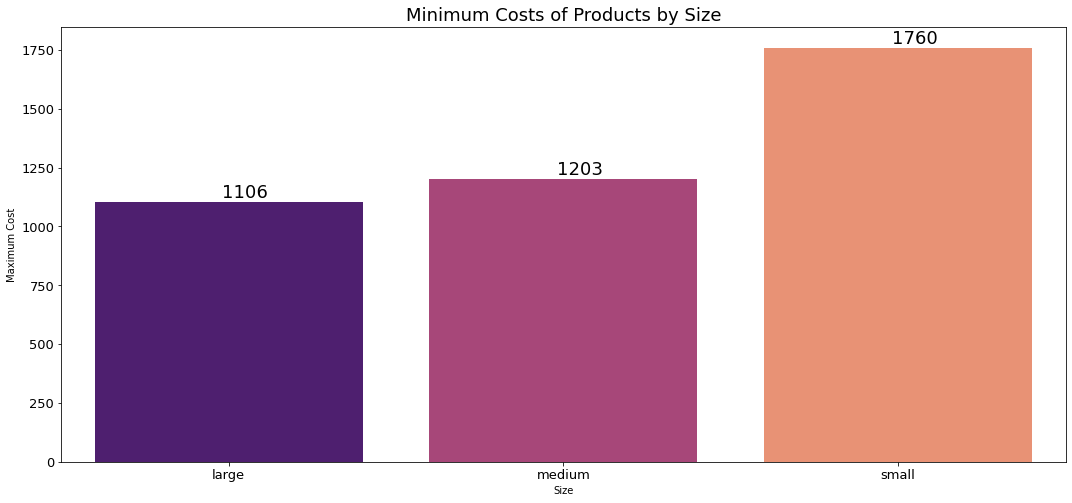

In [65]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Maximum Cost", data = mcs, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Minimum Costs of Products by Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Minimum Cost by Size**

In [66]:
mcs = df_new.groupby("product_size")["standard_cost"].agg(["min"]).reset_index()
mcs.columns = ["Size", "Minimum Cost"]
mcs

,Size,Minimum Cost
0,large,7.21
1,medium,13.44
2,small,131.92


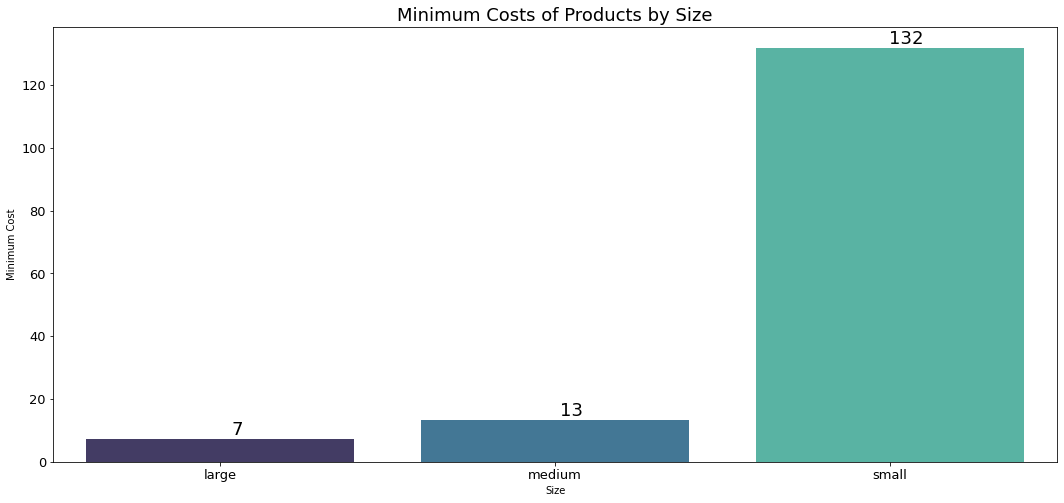

In [67]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Minimum Cost", data = mcs, palette = "mako")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Minimum Costs of Products by Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

### 8-Brands

**Top 5 Cheapest Brands**

In [68]:
cheap = df_new.groupby("brand")["list_price"].agg("min").sort_values(ascending = True)
cheap = pd.DataFrame(cheap).reset_index()
cheap.columns = ["Brand", "Price"]
cheap

,Brand,Price
0,OHM Cycles,12.01
1,WeareA2B,60.34
2,Solex,71.49
3,Giant Bicycles,230.91
4,Trek Bicycles,290.62
5,Norco Bicycles,360.40


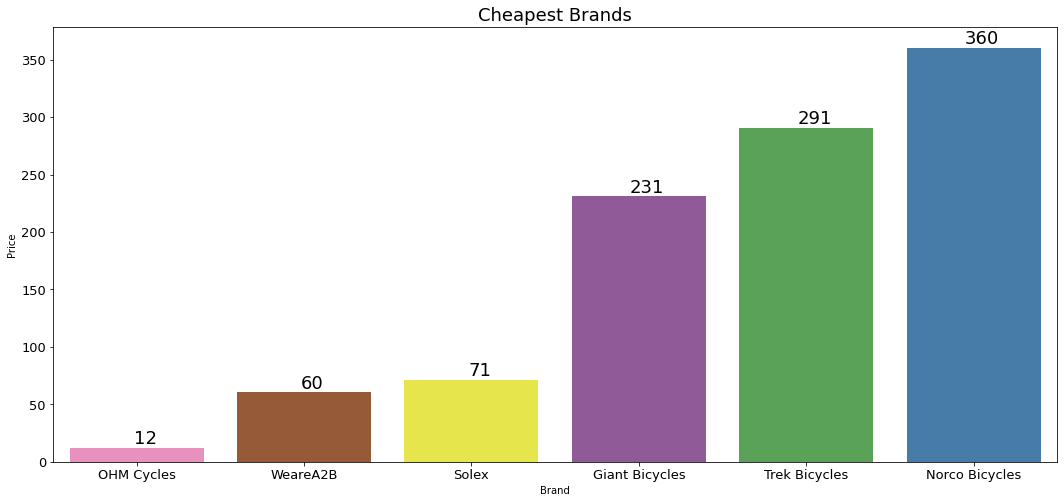

In [69]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Brand", y = "Price", data = cheap, palette = "Set1_r")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Cheapest Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Top 5 Expensive Brands**

In [70]:
expensive = df_new.groupby("brand")["list_price"].agg("max").sort_values(ascending = False)
expensive = pd.DataFrame(expensive).reset_index()
expensive.columns = ["Brand", "Price"]
expensive

,Brand,Price
0,Trek Bicycles,2091.47
1,Solex,2083.94
2,OHM Cycles,2005.66
3,WeareA2B,1992.93
4,Giant Bicycles,1977.36
5,Norco Bicycles,1661.92


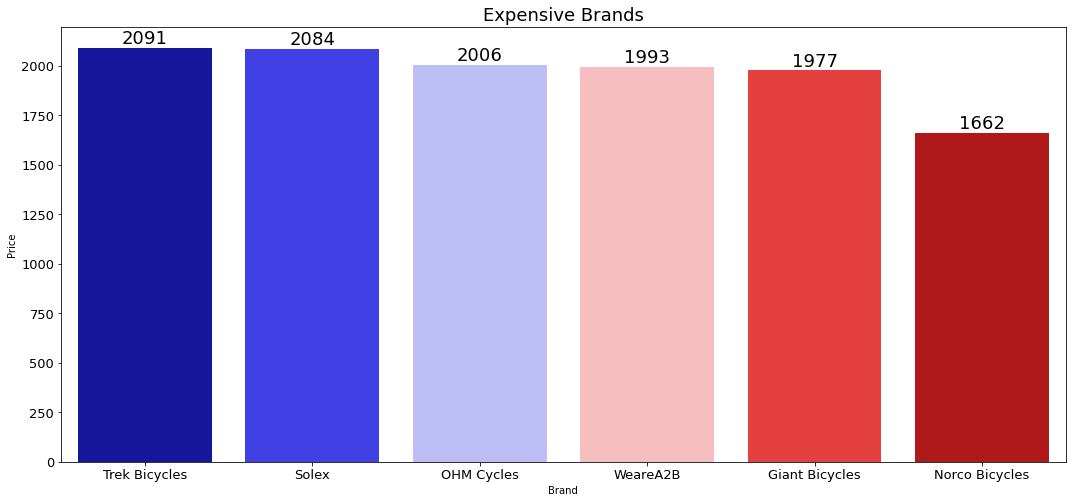

In [71]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Brand", y = "Price", data = expensive, palette = "seismic")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Expensive Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Maximum Profit by Brand**

In [72]:
profit_brand = df_new.groupby("brand")["Profit"].agg("max").sort_values(ascending = False)
profit_brand = pd.DataFrame(profit_brand).reset_index()
profit_brand.columns = ["Brand", "Profit"]
profit_brand

,Brand,Profit
0,Trek Bicycles,1702.55
1,WeareA2B,1660.88
2,Solex,1612.25
3,OHM Cycles,1592.19
4,Giant Bicycles,1230.27
5,Norco Bicycles,830.24


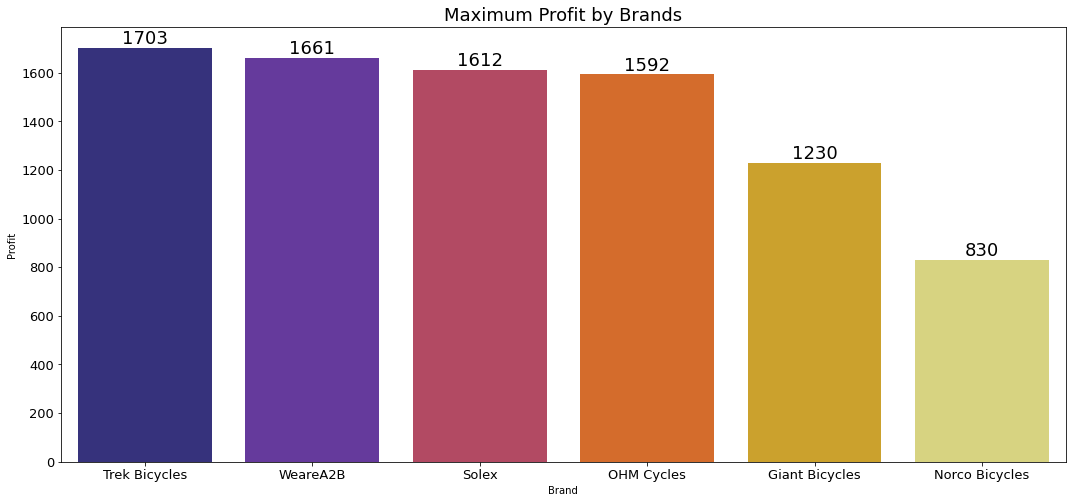

In [73]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Brand", y = "Profit", data = profit_brand, palette = "CMRmap")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Maximum Profit by Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Minimum Profit by Brands**

In [74]:
minimum_profit = df_new.groupby("brand")["Profit"].agg("min").sort_values()
minimum_profit = pd.DataFrame(minimum_profit).reset_index()
minimum_profit.columns = ["Brand", "Profit"]
minimum_profit

,Brand,Profit
0,OHM Cycles,4.80
1,WeareA2B,15.08
2,Solex,17.87
3,Giant Bicycles,41.13
4,Norco Bicycles,64.51
5,Trek Bicycles,75.48


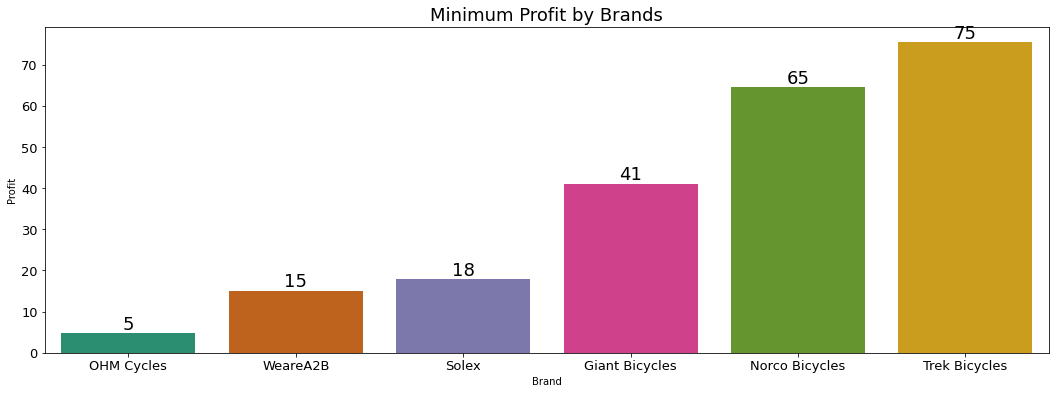

In [75]:
plt.figure(figsize = (18, 6))
graph = sns.barplot(x = "Brand", y = "Profit", data = minimum_profit, palette = "Dark2")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Minimum Profit by Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Sum of Profits by Brands**

In [76]:
profitable = df_new.groupby("brand")["Profit"].agg(["sum"]).reset_index()
profitable.columns = ["Brand", "Profits"]
profitable

,Brand,Profits
0,Giant Bicycles,1536461.24
1,Norco Bicycles,839008.46
2,OHM Cycles,1443852.60
3,Solex,2358352.84
4,Trek Bicycles,1796860.46
5,WeareA2B,2668800.58


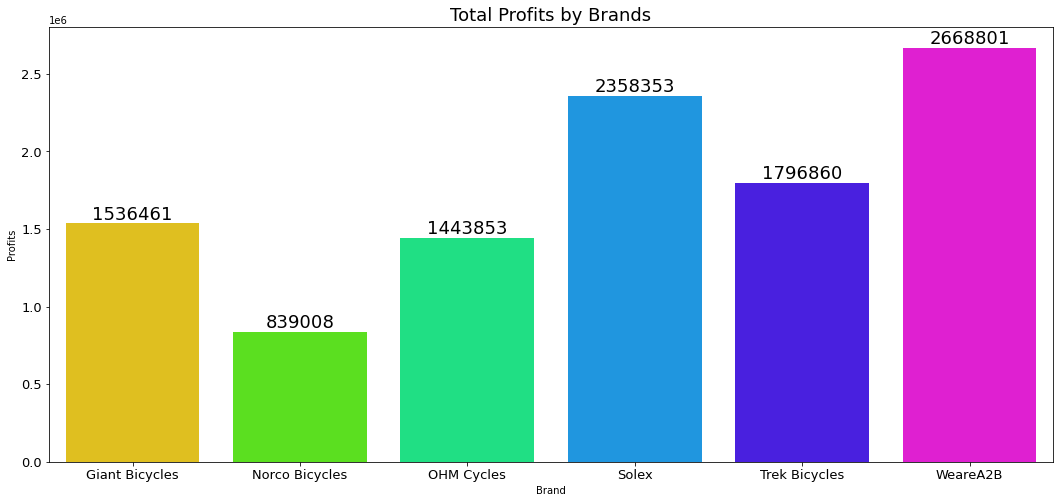

In [77]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Brand", y = "Profits", data = profitable, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Total Profits by Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

### 9-Gender

**Gender by highest and lowest age**

In [78]:
gender = df_new.groupby("gender")["Age"].agg(["max", "min"])
gender

,max,min
gender,,
Female,86,19
Male,90,19


<Figure size 1296x432 with 0 Axes>

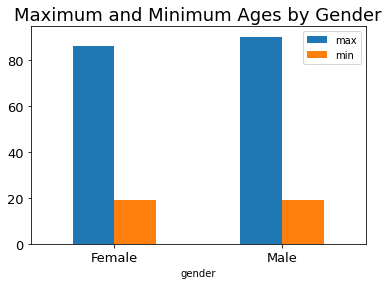

In [79]:
plt.figure(figsize = (18, 6))
gender.plot(kind = "bar", rot = 0)
plt.title("Maximum and Minimum Ages by Gender", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

### 10-Past 3 Years Bike Related Purchases

In [80]:
bikes = df_new["past_3_years_bike_related_purchases"].value_counts()
bikes = pd.DataFrame(bikes).reset_index()
bikes.columns = ["Purchases", "Count"]
bikes.head()

,Purchases,Count
0,16,287
1,80,274
2,2,265
3,48,263
4,13,261


**Maximum Purchases by Past 3 Years Bike Related Purchases**

In [81]:
max_bikes = bikes.sort_values(by = "Purchases", ascending = False)
max_bikes.head()

,Purchases,Count
33,99,223
9,98,252
29,97,227
20,96,238
94,95,141


**Minimum Purchases by Past 3 Years Bike Related Purchases**

In [82]:
min_bikes = bikes.sort_values(by = "Purchases", ascending = True)
min_bikes.head()

,Purchases,Count
61,0,194
84,1,171
2,2,265
95,3,136
72,4,183


### 11-Jobs

**Highest Number of People From Different Jobs**

In [83]:
jobs = df_new["job_title"].value_counts()
jobs = pd.DataFrame(jobs).reset_index()
jobs.columns = ["Job Title", "People"]
jobs.head()

,Job Title,People
0,Social Worker,230
1,Business Systems Development Analyst,218
2,Nuclear Power Engineer,212
3,Legal Assistant,210
4,Internal Auditor,208


**Lowest Number of People From Different Jobs**

In [84]:
jobs = df_new["job_title"].value_counts().sort_values(ascending = True)
jobs = pd.DataFrame(jobs).reset_index()
jobs.columns = ["Job Title", "People"]
jobs.head()

,Job Title,People
0,Developer I,10
1,Geologist II,11
2,Research Assistant III,11
3,Automation Specialist IV,16
4,Administrative Assistant I,16


### 12-Job Categories

**Number of People From Job Categories**

In [85]:
category = df_new["job_industry_category"].value_counts()
category = pd.DataFrame(category).reset_index()
category.columns = ["Category", "People"]
category

,Category,People
0,Manufacturing,4199
1,Financial Services,4043
2,Health,3226
3,Retail,1836
4,Property,1353
5,IT,735
6,Entertainment,734
7,Argiculture,604
8,Telecommunications,379


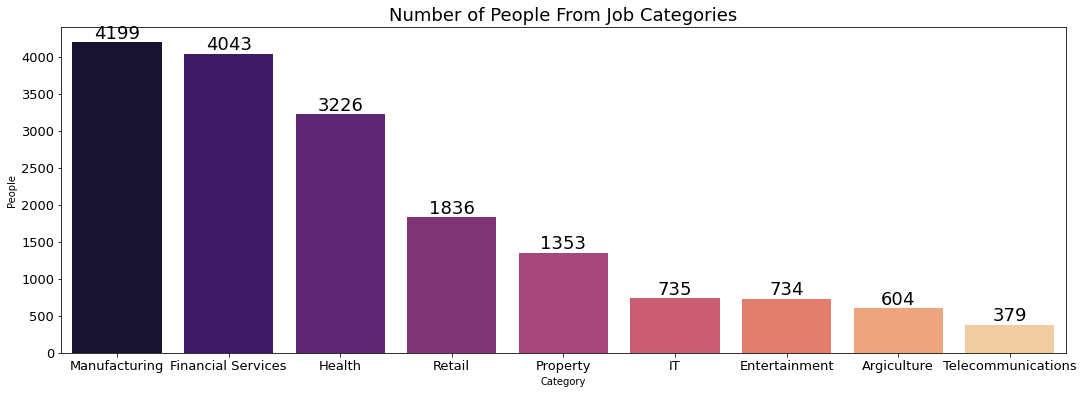

In [86]:
plt.figure(figsize = (18, 6))
graph = sns.barplot(x = "Category", y = "People", data = category, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Number of People From Job Categories", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Transactions by People of Different Industries** 

In [87]:
trans_cat = df_new.groupby(["job_industry_category", "gender"])["gender"].agg(["count"])
trans_cat = trans_cat.reset_index()
trans_cat.columns = ["Industry", "Gender", "People"]
trans_cat

,Industry,Gender,People
0,Argiculture,Female,330
1,Argiculture,Male,274
2,Entertainment,Female,348
3,Entertainment,Male,386
4,Financial Services,Female,2035
5,Financial Services,Male,2008
6,Health,Female,1631
7,Health,Male,1595
8,IT,Female,380
9,IT,Male,355


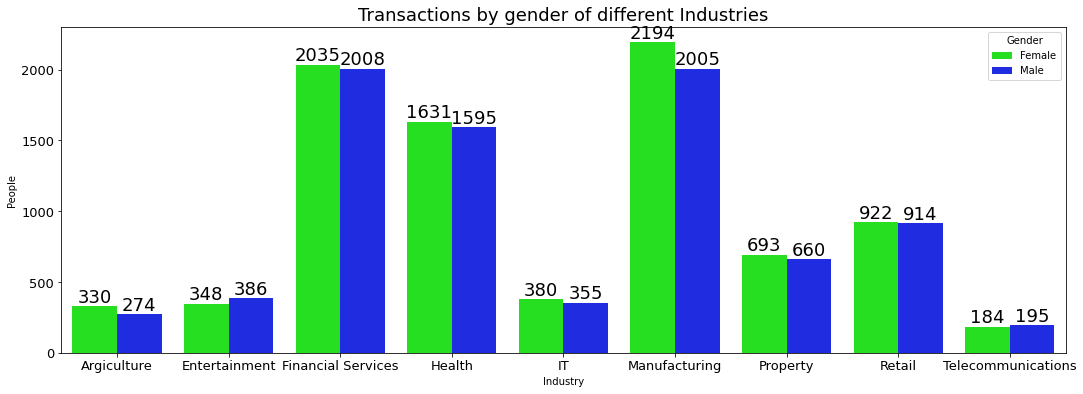

In [88]:
plt.figure(figsize = (18, 6))
graph = sns.barplot(x = "Industry", y = "People", hue = "Gender", data = trans_cat, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Transactions by gender of different Industries", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

In [89]:
pivot = trans_cat.pivot_table(values = "People", index = "Industry", columns = "Gender")
pivot.columns.name = None
pivot.index.name = None
pivot

,Female,Male
Argiculture,330,274
Entertainment,348,386
Financial Services,2035,2008
Health,1631,1595
IT,380,355
Manufacturing,2194,2005
Property,693,660
Retail,922,914
Telecommunications,184,195


### 13-Segment

**Wealth Segement of Customers**

In [90]:
wealth = df_new["wealth_segment"].value_counts()
wealth = pd.DataFrame(wealth).reset_index()
wealth.columns = ["Segment", "People"]
wealth

,Segment,People
0,Mass Customer,10282
1,High Net Worth,5214
2,Affluent Customer,5000


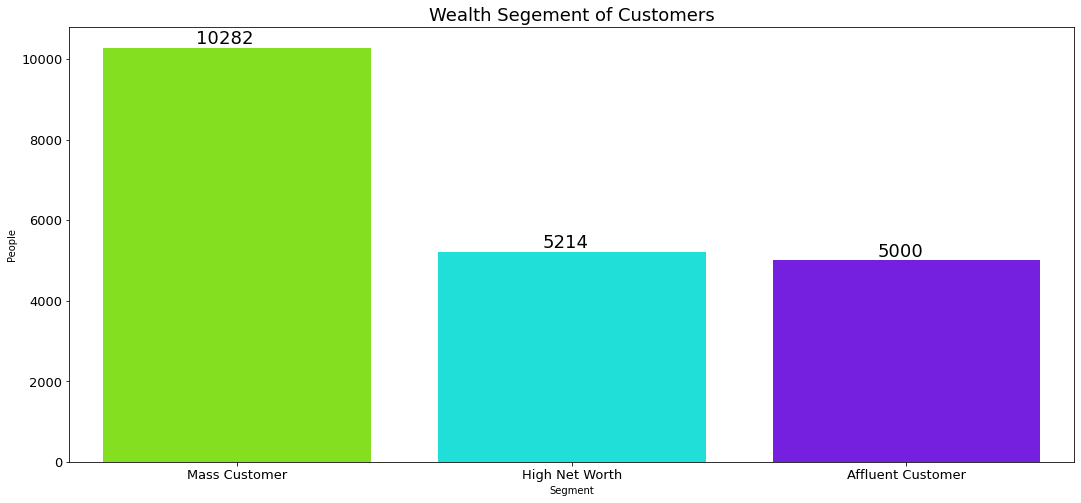

In [91]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Segment", y = "People", data = wealth, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='right', va='bottom',color= 'black', size = 18)
plt.title("Wealth Segement of Customers", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Wealth Segments of Customers by Gender**

In [92]:
wealth_gender = df_new.groupby(["wealth_segment", "gender"])["gender"].agg(["count"]).reset_index()
wealth_gender.columns = ["Segment", "Gender", "Count"]
wealth_gender

,Segment,Gender,Count
0,Affluent Customer,Female,2475
1,Affluent Customer,Male,2525
2,High Net Worth,Female,2644
3,High Net Worth,Male,2570
4,Mass Customer,Female,5391
5,Mass Customer,Male,4891


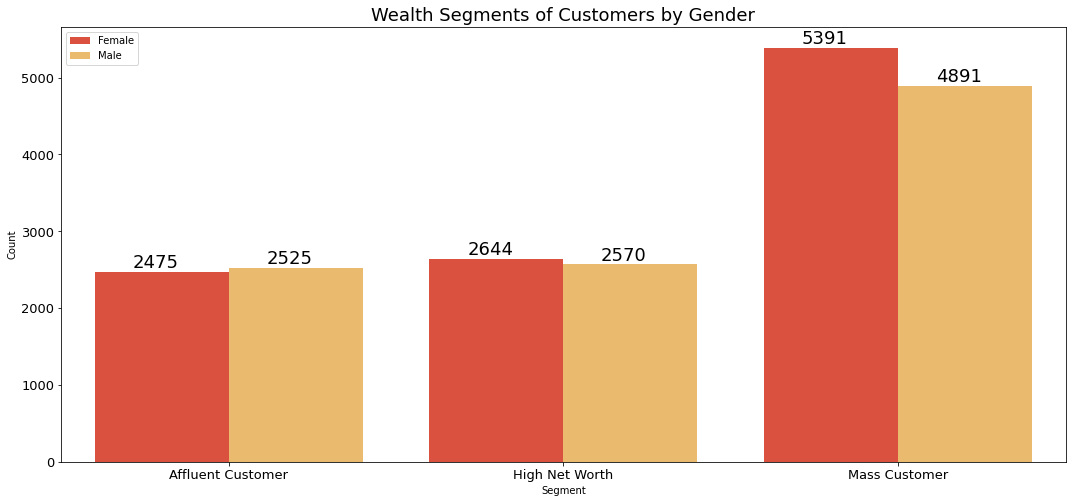

In [93]:
plt.figure(figsize =(18, 8))
graph = sns.barplot(x = "Segment", y = "Count", hue = "Gender", data = wealth_gender, palette = "YlOrRd_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.25, p.get_height()),
                       ha='right', va='bottom',color= 'black', size = 18)
plt.title("Wealth Segments of Customers by Gender", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.legend(loc = "upper left")
plt.show()

### 14-Deceased Indicators

In [94]:
di = df_new["deceased_indicator"].value_counts()
di = pd.DataFrame(di).reset_index()
di.columns = ["Status", "Deceased Indicators"]
di

,Status,Deceased Indicators
0,No,20488
1,Yes,8


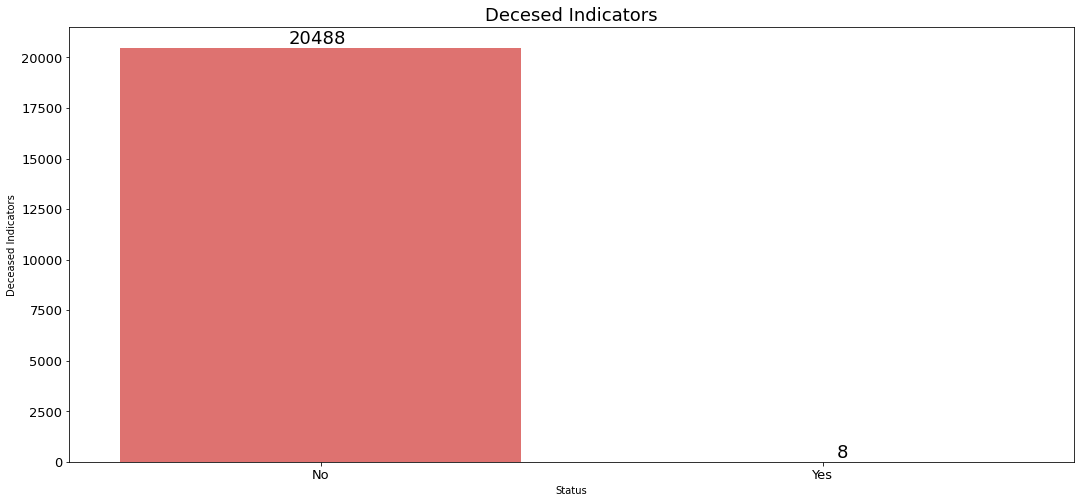

In [95]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Status", y = "Deceased Indicators", data = di, palette = "magma_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='right', va='bottom',color= 'black', size = 18)
plt.title("Decesed Indicators", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

All deceased indicators are female

In [96]:
d_i = df_new.groupby(["first_name", "last_name", "Age", "state", "deceased_indicator", "gender"])["gender"].agg(["count"]).reset_index()
d_i.columns = ["First Name", "Last Name", "Age", "State", "Deceased Indicator", "Gender", "Count"] 
d_i = d_i[d_i["Deceased Indicator"] == "Yes"]
d_i

,First Name,Last Name,Age,State,Deceased Indicator,Gender,Count
2157,Josy,St. Quentin,51,New South Wales,Yes,Female,8


### 15-Cars

**Count Number of Customers having Cars**

In [97]:
cars = df_new["owns_car"].value_counts()
cars = pd.DataFrame(cars).reset_index()
cars.columns = ["Owns Car", "People"]
cars

,Owns Car,People
0,Yes,10272
1,No,10224


**Count Cars by gender**

In [98]:
car_gender = df_new.groupby(["owns_car", "gender"])["gender"].agg(["count"]).reset_index()
car_gender.columns = ["Owns Car", "Gender", "People"]
car_gender

,Owns Car,Gender,People
0,No,Female,5154
1,No,Male,5070
2,Yes,Female,5356
3,Yes,Male,4916


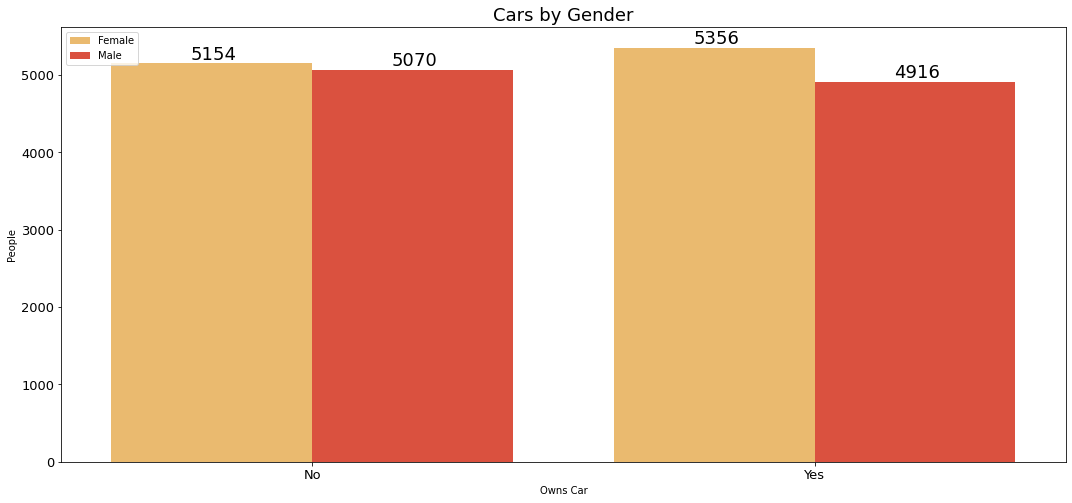

In [99]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Owns Car", y = "People", hue = "Gender", data = car_gender, palette = "YlOrRd")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.25, p.get_height()),
                       ha='right', va='bottom',color= 'black', size = 18)
plt.title("Cars by Gender", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.legend(loc='upper left')
plt.show()

**Cars by Job Industry Category**

In [100]:
car_job = df_new.groupby(["owns_car", "job_industry_category", ])["owns_car"].agg(["count"]).reset_index()
car_job = car_job[car_job.owns_car != "No"]
car_job = car_job.drop(columns = ["owns_car"])
car_job.columns = ["Industry", "Cars"]
car_job

,Industry,Cars
9,Argiculture,327
10,Entertainment,305
11,Financial Services,2169
12,Health,1594
13,IT,390
14,Manufacturing,2056
15,Property,715
16,Retail,901
17,Telecommunications,177


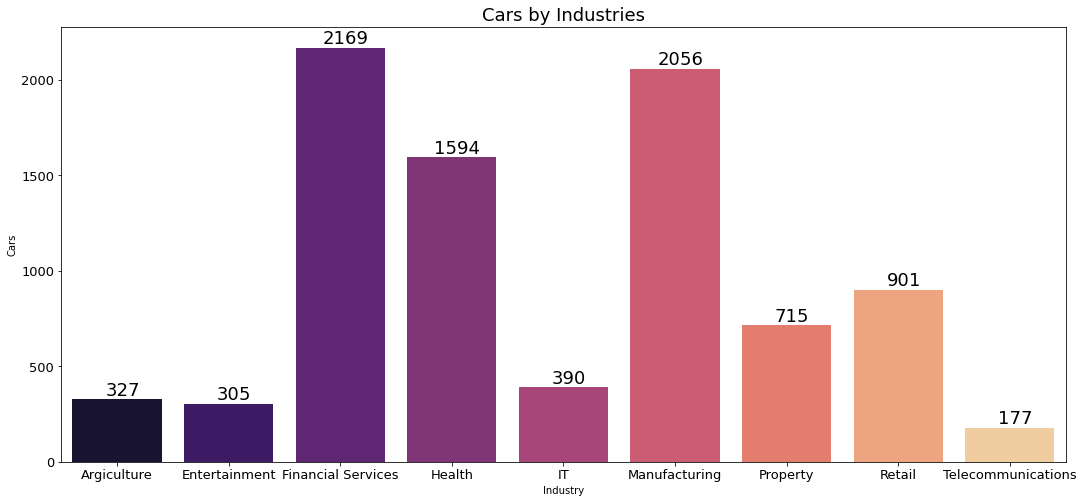

In [101]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Industry", y = "Cars", data = car_job, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Cars by Industries", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Cars by Wealth Segment**

In [102]:
car_wealth = df_new.groupby(["wealth_segment", "owns_car"])["owns_car"].agg(["count"]).reset_index()
car_wealth = car_wealth[car_wealth["owns_car"] == "Yes"]
car_wealth = car_wealth.drop(columns = ["owns_car"])
car_wealth.columns = ["Segment", "Cars"]
car_wealth

,Segment,Cars
1,Affluent Customer,2633
3,High Net Worth,2617
5,Mass Customer,5022


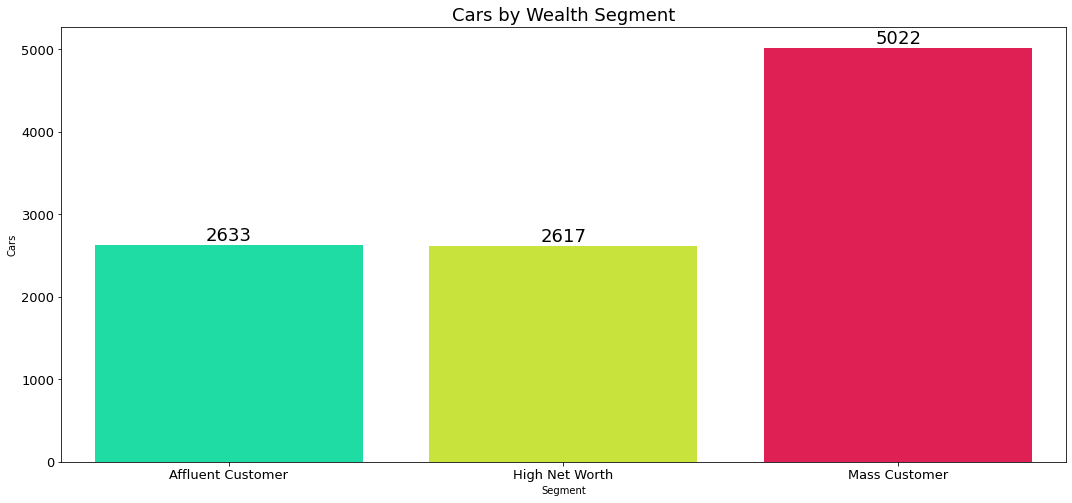

In [103]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Segment", y = "Cars", data = car_wealth, palette = "gist_ncar")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Cars by Wealth Segment", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**Cars by State**

In [104]:
state_cars = df_new.groupby(["state", "owns_car"])["owns_car"].agg(["count"]).reset_index()
state_cars = state_cars[state_cars["owns_car"] == "Yes"]
state_cars = state_cars.drop(columns = ["owns_car"])
state_cars.columns = ["State", "Cars"]
state_cars

,State,Cars
1,New South Wales,5590
3,Queensland,2209
5,Victoria,2473


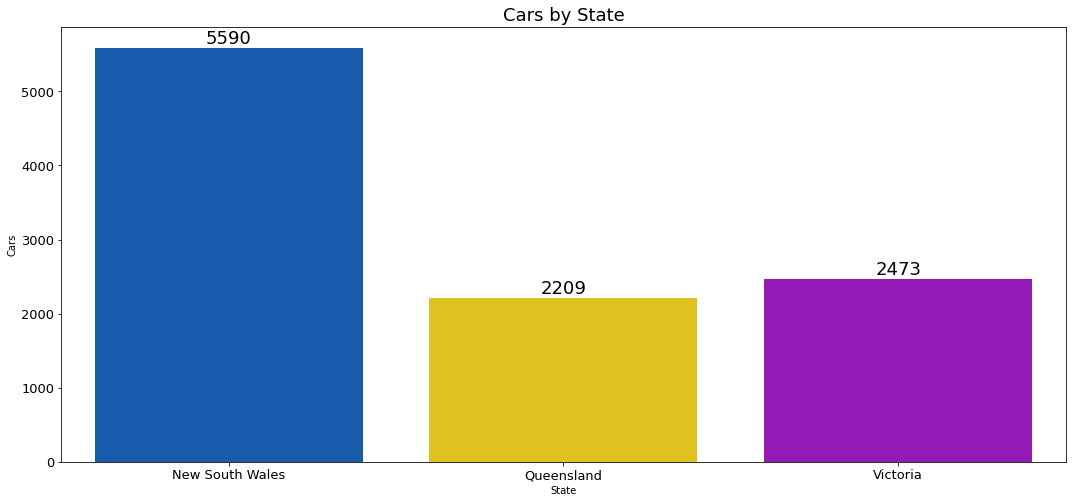

In [105]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "State", y = "Cars", data = state_cars, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+ 0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Cars by State", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

### 16-States

**Number of Customers in States**

In [106]:
customer_states = df_new["state"].value_counts().reset_index()
customer_states.columns = ["States", "People"]
customer_states

,States,People
0,New South Wales,10944
1,Victoria,5153
2,Queensland,4399


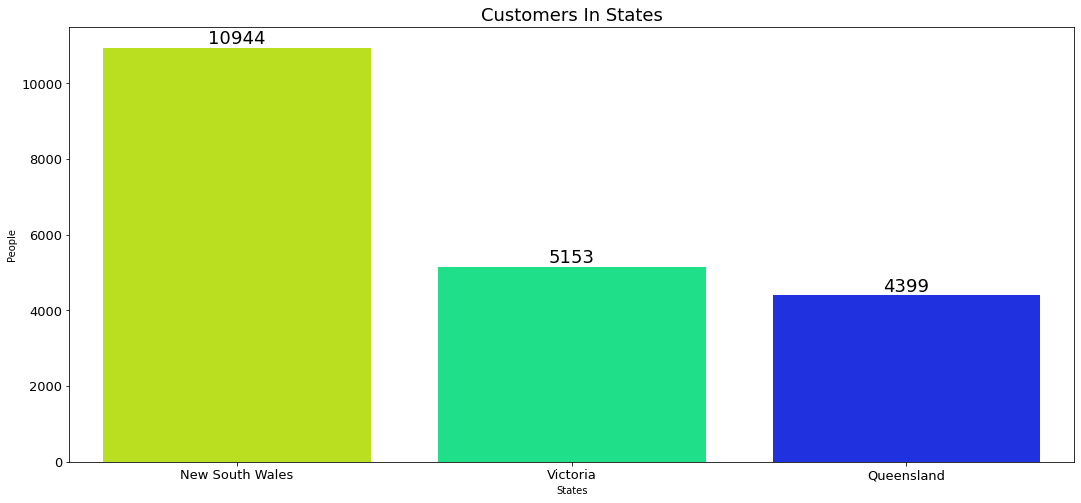

In [107]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "States", y = "People", data = customer_states, palette = "gist_rainbow") 
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Customers In States", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()